# GTCG LAB 2  
## Miguel Moreno

We want to produce an animated valentine. It will consist of a heart entering the scene and moving along a spiral trajectory until it reaches the center of the screen. We want to do something better than what you can see in the figure. Our improvements will be at least two:

- First, our heart will not stay vertical at all times: it will change its orientation (i.e., rotate) depending on its position along its trajectory. Of course, it will end its trip in vertical position. 

- Second, our heart will increase its size as it gets closer to its final destination. 

Observation. Sage allows animations, see:

http://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html



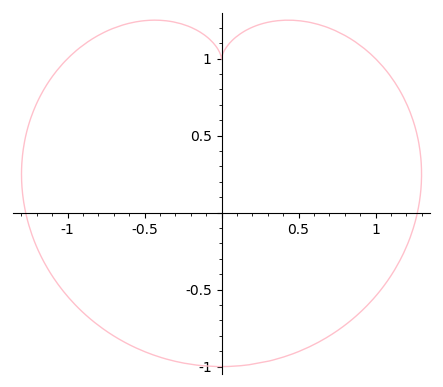

In [39]:
s, t = var('s,t')
a = 1
k = 1.5

Spiral = vector([ 
    a*(k*pi - t) * sin(k*pi - t) ,
   -a*(k*pi - t) * cos(k*pi - t)
])

SpiralTangents = vector([ 
  -(k*pi - t)*sin((k*pi - t)) + cos((k*pi - t)),     # derivative( a * (t) * cos(t) ),
   (k*pi - t)*cos((k*pi - t)) + sin((k*pi - t))      # derivative( a * (t) * sin(t) )
])

# Cardioid heart, normalized so that it remains "centered" w.r.t to the inner part of the Y-axis
# it is flipped,  but the rotations will take care of it :)
Heart = vector( [  
    a*sin(t)*(1 - cos(t)),
    a*cos(t)*(1 - cos(t)) + a
])



hp  = parametric_plot( Heart ,  (t, 0, 2*pi), color = "pink")
sp  = parametric_plot( Spiral, (t, 0, k*pi), color = "blue")
tp  = parametric_plot( SpiralTangents, (t, 0, k*pi), color = "green", linestyle=":")
show(hp)

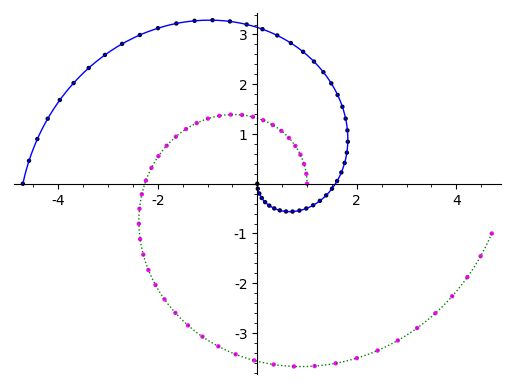

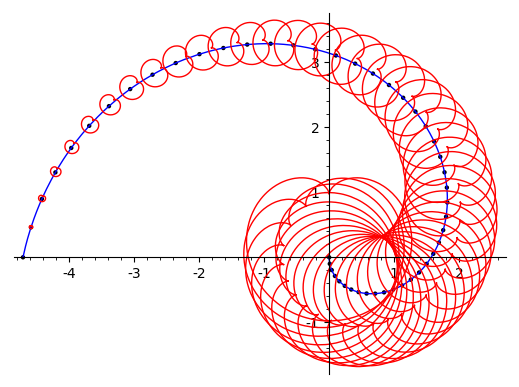

In [43]:
NSTEPS = 47 #+1 !!!

vals = [] ; tans = []
i = 0
# coordinates for cardioid points
while i <= k*pi :
    j = k*pi - i
    vals += [ vector([ a*j*sin(j), -a*j*cos(j) ]) ]
    tans += [ vector([-j*sin(j) + cos(j), j*cos(j) + sin(j) ]) ]
    i = i + (k*pi / NSTEPS)
mp  = point(vals, color="black") ; pp  = point(tans, color="magenta")

#Show the spiral, the tangent and a subset number of steps 
show( sp + mp + tp + pp )


cp = point([0,0], pointsize=0) # blank constructor
AnimList = []
for j in range(0, len(vals)):
    S = j / len(vals)
    e1 = vector( tans[j] - vals[j]*2 ).normalized()
    
    #Rotation matrix
    rot = matrix( [
        [ e1[0], -e1[1]],
        [ e1[1],  e1[0]]
    ] ) #.transpose()
    
    # Scale factor
    S = float(j)/len(vals) 
    
    #X' = AX + w
    heart = rot * vector(
        [ 
            S*a*sin(t)*(1 - cos(t)),       
            S*a*cos(t)*(1 - cos(t)) + S*a
        ] 
    ) + vals[j]
    AnimList += [ parametric_plot( heart , (t, 0, 2*pi), color="red" ) + sp + mp ]
    cp += parametric_plot( heart , (t, 0, 2*pi), color="red" )

show(sp + mp + cp)

Animation with 48 frames
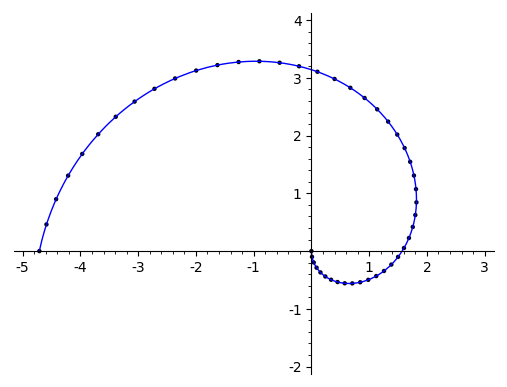

In [221]:
AN = animate( AnimList, xmin=-5, xmax=3, ymin=-2, ymax=4 )
str(AN)    # animations produced from a generator do not have a known length
AN.show()

#AN.show(format = "webm") #mp4, avi, matroska